From this [site](https://www.queeringthemap.com/) we retrieve the information from every marker in the map.
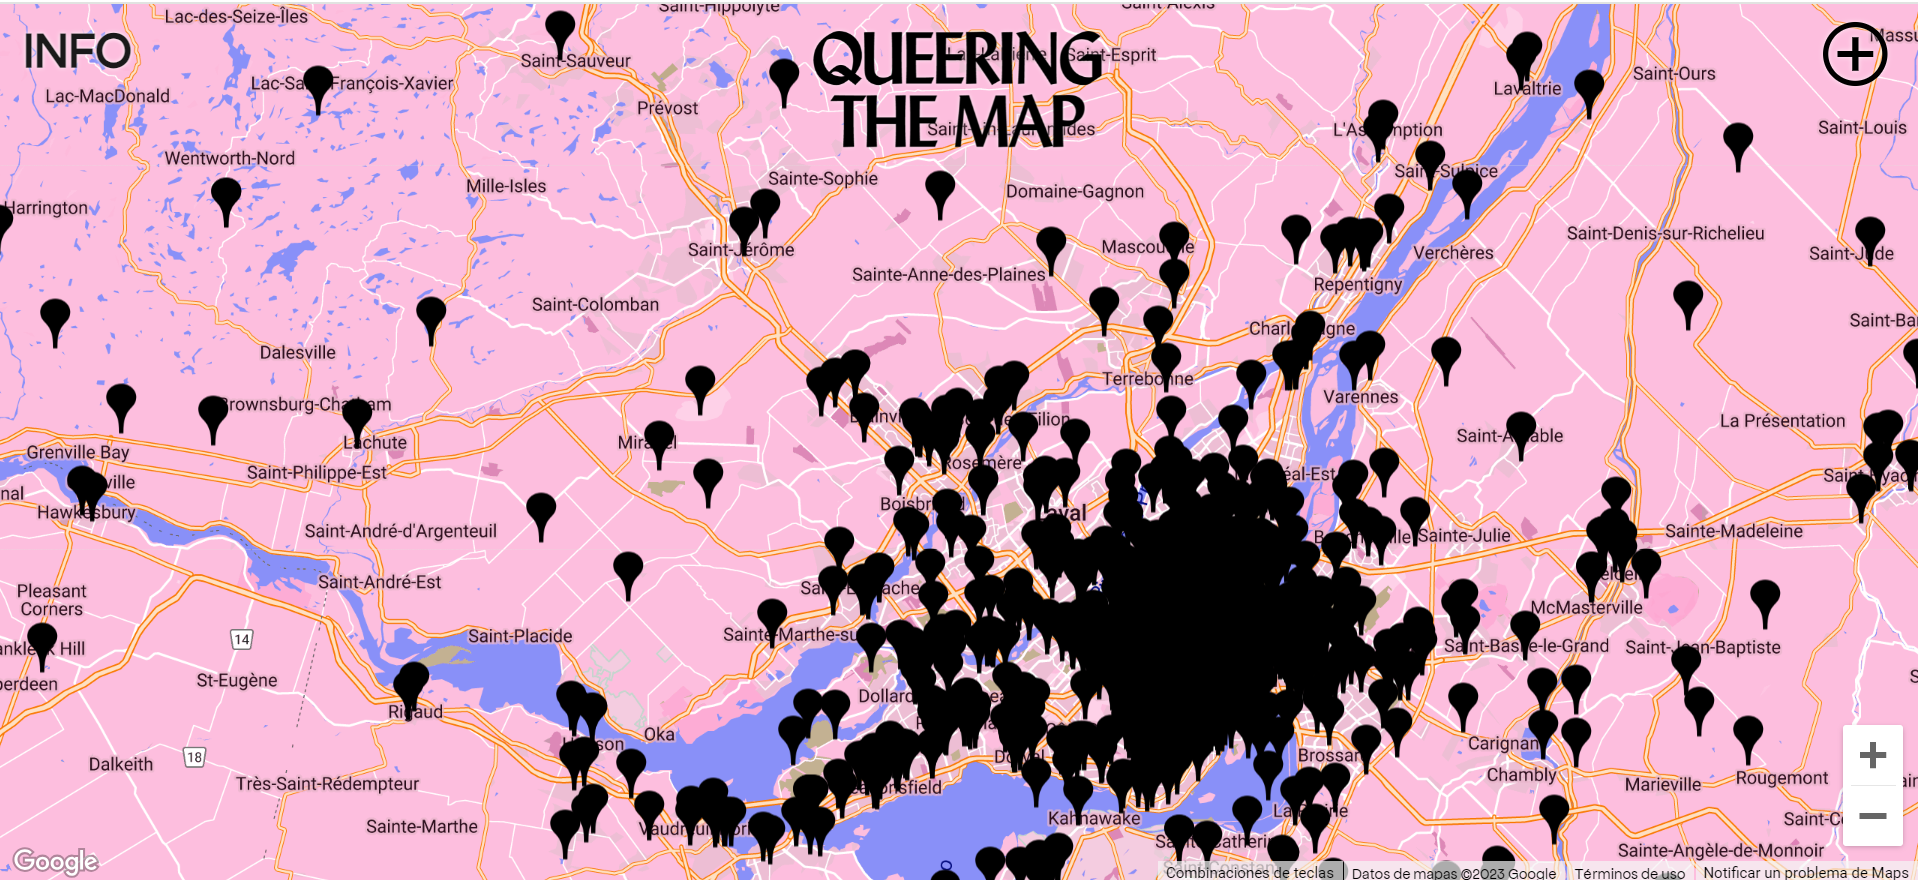

In [1]:
import msgpack
import requests
import json

In [2]:
url = "https://www.queeringthemap.com/moments.msgpack"

In [6]:
# The ending number of the range cannot be guessed, it has to be checked periodically
urls = [url + f"?page={i}" for i in range (2,590)]
urls.append(url)

In [7]:
res = [requests.get(i) for i in urls]
data = [msgpack.unpackb(i.content, raw=False) for i in res if i.status_code == 200]
data[0]

{'is_paginated': True,
 'moment_list': [{'latitude': 49.25727418428457,
   'longitude': -123.10083568096161,
   'description': 'queer prom at heritage hall has a really special place in my heart. the first time i ever really made out with a girl was here. i remember walking home and still being able to smell her on my dress.',
   'id': 251},
  {'latitude': -34.92225253713622,
   'longitude': 138.60993146896362,
   'description': 'The Red Cross shop where I tried on and purchased a super gay jacket with my mum. Had never felt so comfortable in my own skin, decided to come out that day. ',
   'id': 252},
  {'latitude': -33.894343952417096,
   'longitude': 151.18282914161682,
   'description': 'My best friend and I shared comfortably and honestly for the first time about being young and queer and wanting more. Queer friendships are amazing. I cherish you.',
   'id': 253},
  {'latitude': 49.93774957459563,
   'longitude': -124.7897744178772,
   'description': 'I missed you so much that sum

In [8]:
with open("../data/data_comments.json", "w") as file:
    json.dump(data, file)

## Modularized

In [ ]:
data = []
i = 1
url = "https://www.queeringthemap.com/moments.msgpack"


def get_jsons(i, url):
    extension = f"?page={i}"
    try:
        if i == 1:
            i += 1
            res = requests.get(url)
            data.append(msgpack.unpackb(res.content, raw=False))
            print(url)
            get_jsons(i, url)
            
        else:
            urls = url + extension
            print(urls)
            i += 1
            res = requests.get(urls)
            data.append(msgpack.unpackb(res.content, raw=False))
            get_jsons(i, url)
    except:
        pass
    return data

data = get_jsons(i, url)

In [54]:
len(data)

599

In [56]:
data[1]

{'is_paginated': True,
 'moment_list': [{'latitude': 49.25727418428457,
   'longitude': -123.10083568096161,
   'description': 'queer prom at heritage hall has a really special place in my heart. the first time i ever really made out with a girl was here. i remember walking home and still being able to smell her on my dress.',
   'id': 251},
  {'latitude': -34.92225253713622,
   'longitude': 138.60993146896362,
   'description': 'The Red Cross shop where I tried on and purchased a super gay jacket with my mum. Had never felt so comfortable in my own skin, decided to come out that day. ',
   'id': 252},
  {'latitude': -33.894343952417096,
   'longitude': 151.18282914161682,
   'description': 'My best friend and I shared comfortably and honestly for the first time about being young and queer and wanting more. Queer friendships are amazing. I cherish you.',
   'id': 253},
  {'latitude': 49.93774957459563,
   'longitude': -124.7897744178772,
   'description': 'I missed you so much that sum

In [57]:
with open("../data/data_comments.json", "w") as file:
    json.dump(data, file)   